📊 Correlation of Each Factor with Placement:

ssc_p       0.608
hsc_p       0.491
degree_p    0.480
etest_p     0.128
mba_p       0.077
Name: placed_flag, dtype: float64

💡 'ssc_p' shows the strongest positive correlation with placement (0.608).


C:\Users\lenovo\AppData\Local\Temp\ipykernel_10668\2267544336.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_sorted.index, y=corr_sorted.values, palette="crest")


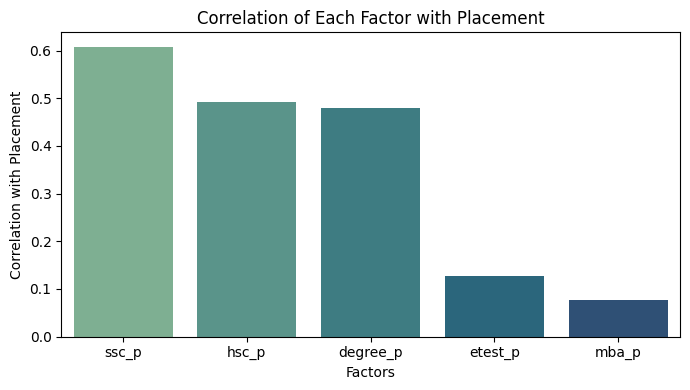

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset 
df = pd.read_csv(r"C:\Users\lenovo\Downloads\Placement_Data_Full_Class.csv")

# Create numeric placement flag
df['placed_flag'] = df['status'].map({'Placed': 1, 'Not Placed': 0})

# Select numeric percentage columns
numeric_cols = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

# Compute correlations with placement outcome
corr_values = df[numeric_cols + ['placed_flag']].corr()['placed_flag'].drop('placed_flag')
corr_sorted = corr_values.sort_values(ascending=False)

print("📊 Correlation of Each Factor with Placement:\n")
print(corr_sorted.round(3))

# Identify the strongest influencer
top_factor = corr_sorted.idxmax()
print(f"\n💡 '{top_factor}' shows the strongest positive correlation with placement "
      f"({corr_sorted[top_factor]:.3f}).")

# ---- Visualization ----
plt.figure(figsize=(7,4))
sns.barplot(x=corr_sorted.index, y=corr_sorted.values, palette="crest")
plt.title("Correlation of Each Factor with Placement")
plt.xlabel("Factors")
plt.ylabel("Correlation with Placement")
plt.tight_layout()
plt.show()


T-test Results:

ssc_p      -> mean placed: 71.72, mean not placed: 57.54, p=0.00000
hsc_p      -> mean placed: 69.93, mean not placed: 58.40, p=0.00000
degree_p   -> mean placed: 68.74, mean not placed: 61.13, p=0.00000
etest_p    -> mean placed: 73.24, mean not placed: 69.59, p=0.04958
mba_p      -> mean placed: 62.58, mean not placed: 61.61, p=0.25669


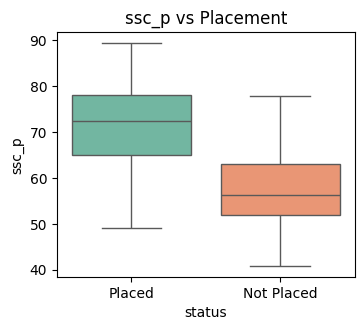

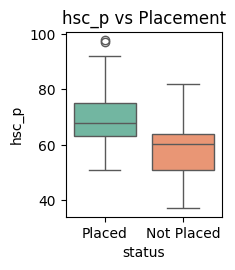

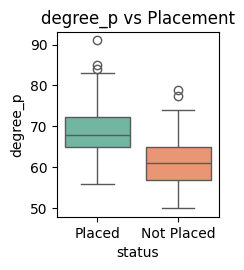

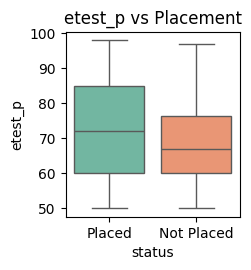

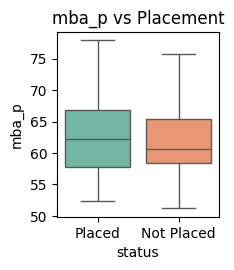

In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

df = pd.read_csv(r"C:\Users\lenovo\Downloads\Placement_Data_Full_Class.csv")
df['placed_flag'] = df['status'].map({'Placed':1, 'Not Placed':0})

numeric_cols = ['ssc_p','hsc_p','degree_p','etest_p','mba_p']

print("T-test Results:\n")
for col in numeric_cols:
    placed = df[df['placed_flag']==1][col].dropna()
    not_placed = df[df['placed_flag']==0][col].dropna()
    t_stat, p_val = ttest_ind(placed, not_placed, equal_var=False)
    print(f"{col:10} -> mean placed: {placed.mean():.2f}, mean not placed: {not_placed.mean():.2f}, p={p_val:.5f}")

# Boxplots for visual comparison
plt.figure(figsize=(10,6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='status', y=col, hue='status', data=df, palette="Set2", legend=False)
    plt.title(f"{col} vs Placement")
    plt.tight_layout()
    plt.show()

📊 Placement Count by Specialisation:

status          Not Placed  Placed
specialisation                    
Mkt&Fin                 25      95
Mkt&HR                  42      53

📈 Placement Rate (%):
specialisation
Mkt&Fin    79.17
Mkt&HR     55.79
dtype: float64

Chi-square = 12.440, p-value = 0.00042
✅ Statistically significant difference — one specialization is more in demand.

💡 Practically, 'Mkt&Fin' has the higher placement rate (79.17%), so it is more in demand among companies.



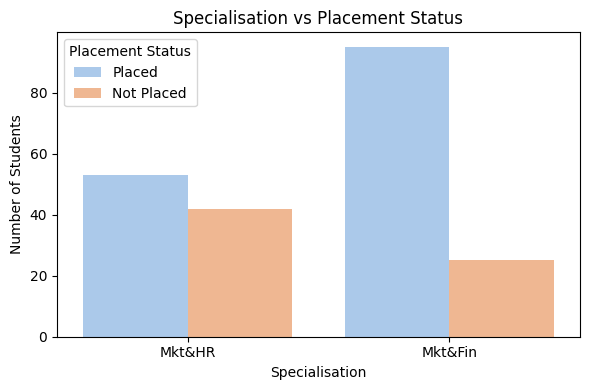

In [27]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (adjust path if needed)
df = pd.read_csv(r"C:\Users\lenovo\Downloads\Placement_Data_Full_Class.csv")

# Create contingency table
ct = pd.crosstab(df['specialisation'], df['status'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(ct)

print("📊 Placement Count by Specialisation:\n")
print(ct)

# Compute placement rates
placement_rate = (ct['Placed'] / ct.sum(axis=1) * 100).round(2)
print("\n📈 Placement Rate (%):")
print(placement_rate)

# Statistical conclusion
print(f"\nChi-square = {chi2:.3f}, p-value = {p:.5f}")
if p < 0.05:
    print("✅ Statistically significant difference — one specialization is more in demand.")
else:
    print("⚠️  No statistically significant difference — both perform similarly.")

# Practical (real-world) interpretation
top_spec = placement_rate.idxmax()
print(f"\n💡 Practically, '{top_spec}' has the higher placement rate ({placement_rate[top_spec]}%), "
      "so it is more in demand among companies.\n")

# ---- Visualization ----
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='specialisation', hue='status', palette="pastel")
plt.title("Specialisation vs Placement Status")
plt.xlabel("Specialisation")
plt.ylabel("Number of Students")
plt.legend(title="Placement Status")
plt.tight_layout()
plt.show()
